## Problem set 3

## Name: [Yawen Tan]

## Link to your PS3 github repo: [https://github.com/IsabellaTan/Brown-DATA1030-HW3.git]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Problem 1: EDA and visualizations

### Problem 1a: EDA (5 points)

One of the datasets we will be working with this semester is the kaggle house price dataset. The goal of PS3 is to use this dataset to practice dataframe manipulations and perform EDA. The dataset, and its description, are located in the `data` folder.

Carefully read the dataset description. Whenever you work with a dataset, it is highly recommended that you prepare a similar description if it is not readily available. Specific things to note:

- each feature is described in full detail,
- the meaning of continuous features is explained and their unit is provided (e.g., lot size is measured in square feet),
- each category in a categorical or ordinal feature is spelled out and explained.

Answer the following EDA-related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First, you always want to know how many data points and features you have, and whether they are continuous, ordinal, or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 1b.

**Q0** First, read the data into a data frame and display the columns of the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 

In [ ]:
# your code here

import pandas as pd
df = pd.read_excel('C:/Users/DELL/Desktop/zy/OneDrive/Brown/DATA1030/assignment3/Brown-DATA1030-HW3/data/train.xlsx', sheet_name='data')
print(df.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Q1** How many rows and columns do we have in the dataframe?

In [ ]:
# your code here 

print("The number of row is " + str(df.shape[0]))
print("The number of columb is " + str(df.shape[1]))

The number of row is 1460
The number of columb is 80


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [ ]:
# your code here

# Create a for loop to iterate through each column and print its name and data type
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int64
Function

**Q3** The ML target variable in this dataset is the sale price. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.

In [ ]:
# your code here

print(df["SalePrice"].describe())
# 'SalePrice' is countinuous variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Q4** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

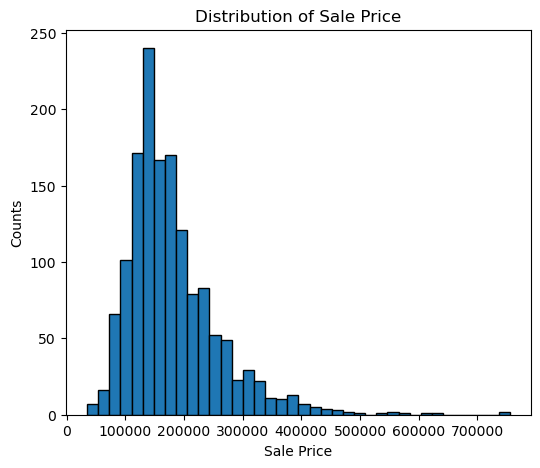

In [ ]:
# your code here 

import matplotlib
from matplotlib import pylab as plt
import numpy as np
# Set the figure size
plt.figure(figsize=(6,5))
# Create the histogram
df['SalePrice'].plot.hist(
    bins = int(np.sqrt(df.shape[0])), # Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    linewidth=1 # Width of the edge of the bars
    )
# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Counts')
plt.title('Distribution of Sale Price')

plt.show()

### Problem 1b: visualization (10 points)

Find one continuous, one ordinal, and one categorical feature that strongly correlates with the sale price. Create figures that illustrate your selected features and the sale price.

Don't forget to add axis labels and titles, and find apropriate arguments. Write figure captions to explain what the figure shows.

If you know how to quantitatively assess correlation strengths between variables, feel free to use those techniques. Qualitative/visual assessment also works for now.

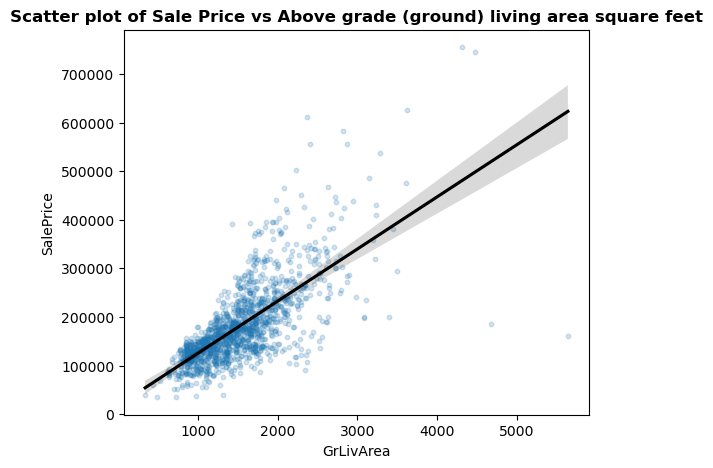

The Pearson correlation coefficient between GrLivArea and SalePrice is 0.71
Based on the scatter plot and the correlation coefficient, there is a strong positive linear relationship between GrLivArea and SalePrice. As the above grade living area increases, the sale price tends to increase as well.


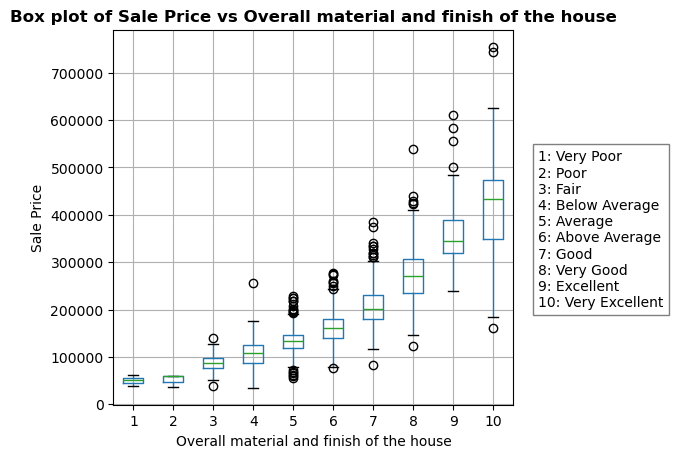

The Spearman correlation coefficient between OverallQual and SalePrice is 0.81
Based on the box plot and the correlation coefficient, there is a strong positive monotonic relationship between OverallQual and SalePrice. As the overall quality of the house increases, the sale price tends to increase as well.


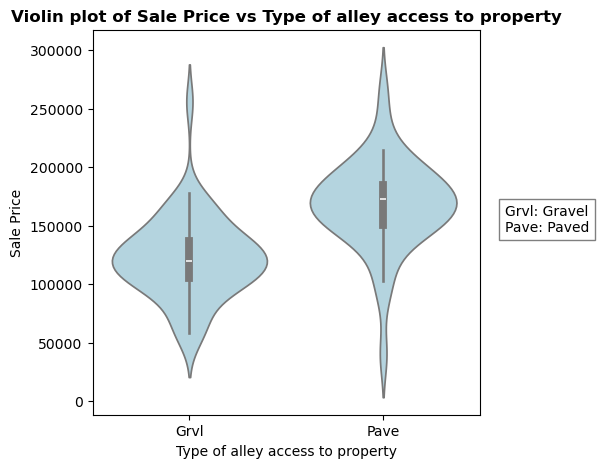

Based on the violin plot, houses with paved alley access tend to have higher sale prices compared to those with gravel alley access. The type of alley access appears to have an impact on the sale price of the house.


In [ ]:
# your code here 
import matplotlib.pyplot as plt
import seaborn as sns

# Features that we choose: 
# continuous feature : GrLivArea which is Above grade (ground) living area square feet
# ordinal feature: OverallQual which is Overall material and finish of the house
# categorical feature: Alley which is Type of alley access to property

# Create a scatter plot for GrLivArea vs SalePrice
df.plot.scatter('GrLivArea','SalePrice',alpha=0.1,s=10, figsize=(6,5))
# Add labels and title
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.title('Scatter plot of Sale Price vs Above grade (ground) living area square feet',weight='bold')    
# Add a regression line
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.1, 's':10}, line_kws={'color':'black'})

plt.show()
# Calculate the Pearson correlation coefficient
corr1 = round(df['GrLivArea'].corr(df['SalePrice']),2)

print('The Pearson correlation coefficient between GrLivArea and SalePrice is '+ str(corr1))
print('Based on the scatter plot and the correlation coefficient, there is a strong positive linear relationship between GrLivArea and SalePrice. As the above grade living area increases, the sale price tends to increase as well.')







# Create a dictionary to map the ordinal values to their corresponding labels
cond_labels = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Fair',
    4: 'Below Average',
    5: 'Average',
    6: 'Above Average',
    7: 'Good',
    8: 'Very Good',
    9: 'Excellent',
    10: 'Very Excellent'}
# Create a box plot for OverallQual vs SalePrice
df[['OverallQual','SalePrice']].boxplot(by='OverallQual',figsize=(5,5))
# Add labels and title
plt.ylabel('Sale Price')
plt.xlabel('Overall material and finish of the house')
plt.title('Box plot of Sale Price vs Overall material and finish of the house', weight='bold')
# Delete the automatic 'Boxplot grouped by group_by_column' title
plt.suptitle('')
# Add the mapping of ordinal values to their corresponding labels on the right side of the plot
textstr = '\n'.join([f"{k}: {v}" for k,v in sorted(cond_labels.items())])
plt.gcf().text(0.95, 0.5, textstr, fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()
# Calculate the Spearman correlation
corr2 = round(df['OverallQual'].corr(df['SalePrice'], method='spearman'),2)

print('The Spearman correlation coefficient between OverallQual and SalePrice is ' + str(corr2))
print('Based on the box plot and the correlation coefficient, there is a strong positive monotonic relationship between OverallQual and SalePrice. As the overall quality of the house increases, the sale price tends to increase as well.')



# Create a dictionary to map the categorical values to their corresponding labels
alley_labels = {
    'Grvl':'Gravel',
    'Pave':'Paved'}
# Create a violin plot for Alley vs SalePrice
plt.figure(figsize=(5,5))
sns.violinplot(x='Alley', y='SalePrice', data=df, color='lightblue')
# Add labels and title
plt.ylabel('Sale Price')
plt.xlabel('Type of alley access to property')
plt.title('Violin plot of Sale Price vs Type of alley access to property', weight='bold')
# Add the mapping of categorical values to their corresponding labels on the right side of the plot
textstr2 = '\n'.join([f"{k}: {v}" for k,v in sorted(alley_labels.items())])
plt.gcf().text(0.95, 0.5, textstr2, fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.show()
print('Based on the violin plot, houses with paved alley access tend to have higher sale prices compared to those with gravel alley access. The type of alley access appears to have an impact on the sale price of the house.')




## Problem 2: basic splitting strategy (15 points)

Write a general function that performs basic splitting on a dataset, while also conducting integrity tests on both its inputs and outputs. The function is called basic_split, it is outlined in the cell below. It takes the following arguments as inputs: feature matrix (X), a target variable (y), train_size, val_size, test_size, and random_state. The output of the function should be: X_train, y_train, X_val, y_val, X_test, y_test, the three sets split according to the train, val, test sizes.

This function is general purpose, you'll be able to reuse it for any project if you want to perform basic split on your data.

In [ ]:
def basic_split(feature_matrix,target_variable,train_size = 0.6,val_size=0.2,test_size=0.2,random_state=42):
    '''
    Split dataframes (feature matrix X and target variable y) into random train, validation and test sets

    Parameters:
    -----------
    
    feature_matrix: a dataframe that contains your feature matrix
    target_variable: a series that contains your target variable
    train_size: a float between 0.0 and 1.0, it represents the proportion
        of the dataset to include in the training set
    val_size: a float between 0.0 and 1.0, it represents the proportion
        of the dataset to include in the validation set
    test_size: a float between 0.0 and 1.0, it represents the proportion
        of the dataset to include in the test set
    random_state: an int, it controls the shuffling applied to the data 
        before applying the split

    NOTE: train_size+val_size+test_size must be equal to 1.

    Returns:
    --------
        a tuple containing the train, validation, and test sets

    Example:
    --------

    >>> import numpy as np
    >>> from sklearn.model_selection import train_test_split
    >>>
    >>> X, y = np.arange(10).reshape((5, 2)), range(5)
    >>>
    >>> X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y)

    '''

    # ***************************
    # TODO: test the inputs first
    # ***************************
    # write an if statement to perform each of these checks
    # Important: raise a ValueError with a descriptive error message if something is off
    # call basic_split with incorrect arguments to make sure all of the tests work as intended!
    
    # test 1: if feature_matrix is not a dataframe (pandas or polars), raise ValueError

    # test 2: if the target-variable is not a series (pandas or polars), raise ValueError

    # test 3: if the number of rows in feature_matrix is not equal to the length of target_variable, raise a ValueError

    # test 4: if train_size is less than 0.0 or larger than 1.0, raise ValueError

    # test 5: if val_size is less than 0.0 or larger than 1.0, raise ValueError
    
    # test 6: if test_size is less than 0.0 or larger than 1.0, raise ValueError

    # test 7: if train_size+val_size+test_size is not equal to 1.0, raise ValueError

    # test 8: if random state is not an integer, raise ValueError

    
    # **************************************
    # TODO: implement the splitting strategy
    # **************************************
    # as we discussed in class, use sklearn's train_test_split twice


    # **********************
    # TODO: test the outputs
    # **********************
    # same as above, write an if statement to perform each of these checks
    # raise a ValueError with a descriptive error message if something is off.
    
    # test 1: the number of rows in X_train divided by the number of rows in X should be close to train_size
    # think why we sometimes cannot achieve exact equality 
    # and how you should express this as a condition in the if statement

    # test 2: the number of rows in X_val divided by the number of rows in X should be close to val_size
    
    # test 3: the number of rows in X_test divided by the number of rows in X should be close to test_size

    # test 4: make sure that the length of y_train, y_val, y_test is equal to 
    # the number of rows in X_train, X_val, X_test, respectively

    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function and preform tests here
# test 1: Apply the function to the house price dataset from problem 1 with train_size = 0.6, val_size = 0.2, and test_size = 0.2. 

# test 2: Print out the head of X_train, X_val, and X_test. 
    
# test 3: Make sure that you get the same points in each set every time you rerun the cell (a.k.a., test for reproducability).

# test 4: Try a couple of other train, val, test sizes here. make sure to test the possible extreme values! 


# notice how most of the lines in basic_split are about testing the inputs and outputs and
# testing the inputs ensures that the user correctly calls the function. if they do not, a descriptive error message is returned.
# testing the outputs ensures that your code correctly performs the intended operation anticipating edge cases and potential issues.
# this is pretty typical in software engineering and this is the key to writing reusable code.

# Problem 3: kfold splitting (20 points)

Write a function that performs kfold splitting. We provided the input arguments and the header of the function. You need test the inputs, implement the algorithm, and test the outputs.


In [ ]:
def basic_kfold(feature_matrix,target_variable, k = 5, shuffle = True, random_state = 42):
    '''
    Split dataframes (feature matrix X and target variable y) into `k` number of equal size folds.
    One fold is used as the test set.
    Iterate over the remaining k-1 folds. Fold i is used as the validation set,
    the remaining folds are used as the training set.

    Parameters:
    -----------
    
    feature_matrix: a dataframe that contains your feature matrix
    target_variable: a series that contains your target variable
    k: an int, the number of folds
    shuffle: boolean variable. If True, the feature matrix and the target variable are shuffled
        before the folds are created to randomize the sets
    random_state: an int, it controls the shuffling applied to the data   

    Returns:
    --------
        one test set and a list with `k-1` elements containing tuples of the train and validation sets

    >>> import numpy as np
    >>> from sklearn.model_selection import train_test_split
    >>>
    >>> X, y = np.arange(10).reshape((5, 2)), range(5)
    >>>
    >>> X_test, y_test, train_val_sets = basic_kfold(X,y)

    '''
    # one of the outputs, it will contain the train and validation sets
    train_val_sets = []

    # **********************
    # TODO: test the inputs!
    # **********************
    # test each of the input arguments. consider their types and what values are possible as you come up with the tests
    # come up with at least 8 tests
    # among other things, consider what the smallest and largest k we can have

    
    # **************************************
    # TODO: implement the splitting strategy
    # **************************************
    # you can use numpy, pandas or polars. do not use sklearn here!


    # ***********************
    # TODO: test the outputs!
    # ***********************    
    # test 1: check whether each point is in exactly one set (no point is duplicated and no point is left out)
    
    # test 2: check whether you preserve the row-wise alignment between the feature matrix and the target variable in each set
    # hint: for row-wise alignment, it may be useful to note that row indices do not change when subsetting dfs. 
    # i.e. if a row is index id 10 in dataframe 1, it is still given the index id of 10 in a subsetted df.
    
    # test 3: check whether the order of the columns is the same in each set.
    
    # test 4: perform output tests similar to those in basic_split
    
    
    return X_test, y_test, train_val_sets

################################################
# TODO: call the function and preform tests here
################################################
# test 1: Apply the function to the house price dataset from problem 1 with 4 folds. 

# test 2: Print out the head of the sets.

# test 3: Make sure that you get the same points in each set every time you rerun the cell (a.k.a., test for reproducability).

# test 4: Try a couple of other `k` values. test the extreme values!

